# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework 3<a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework" data-toc-modified-id="Coursework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework</a></span><ul class="toc-item"><li><span><a href="#Coursework-3A---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-3A---Steady-state-advection-diffusion-with-the-FEM-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Coursework 3A - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-3B---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-3B---Time-dependent-advection-diffusion-with-the-FEM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Coursework 3B - Time-dependent advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-3C---2D-mesh-optimisation" data-toc-modified-id="Coursework-3C---2D-mesh-optimisation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Coursework 3C - 2D mesh optimisation</a></span></li></ul></li></ul></div>

# Instructions  <a class="tocSkip">
    

- This is the third of three equally weighted pieces of assessed coursework for this module.


- This is independent work, you cannot work in groups.


- There are three questions below. **The first two are worth 30 marks each, the third 40 marks, hence a total of 100.**


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- Submit your solutions as Jupyter notebooks via Github classroom - please submit a version where you have run all cells and the output/plots etc are visible.

# Coursework

## Coursework 3A - Steady-state advection-diffusion with the FEM



[In this question we want to solve steady-state advection-diffusion. It's up to you whether your starting point is the (local) assembly based finite element solver with time-stepping we implemented in lecture 12 (you will need to include advection and turn it into a solver for the steady state version of the problem), or whether you start from the approach we used in lecture 11 where we solved for steady-state diffusion.]


Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7.

The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.

Do you observe the expected order of convergence?

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this.

Throughout this question you may assume for simplicity a uniform mesh.


*[**Hint:** your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*

*If you decide to use the assembly based approach from lecture 12 then in addition to adding advection you will need to think about how to turn the time-stepping solver into a steady state solver.*]

## Coursework 3B - Time-dependent advection-diffusion with the FEM

In this question we want to solve unsteady advection-diffusion.

*[As for question 3A, it's up to you whether you seek to generalise the (local) assembly based finite element solver we implemented in lecture 12 to include advection, or the approach we used in lecture 11.]*


Test your implementation using the same advection-diffusion of a Gaussian problem considered in Coursework 2 question 1 where an analytical solution to the problem was given.

This time consider the (non-periodic) domain $[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the (Gaussian like) analytical solution from coursework 2 centred initially at $x=0.5$, and with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1.

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

## Coursework 3C - 2D mesh optimisation

In lecture 12 homework question 2 ("Laplacian smoothing") we implemented an algorithm which given a Delaunay triangulation applied "Laplacian smoothing" to the mesh in order to improve its quality.

Let's assume we have a discretisation which prefers triangles which are closer to equilateral, i.e. it does not like angles in the mesh which are close to 0 or close to $\pi$ (in radians). [NB. by angle we mean the angles between any two connected edges, equivalently each of the three angles making up every triangle]. 

Write some code which given a mesh computes all of the angles in the mesh.  Test it on the mesh given in the following cell by finding the maximum and minimum angles. Also plot a histogram of the angles.

Next apply Laplacian smoothing to this mesh and confirm that the angles in the mesh have improved. You will notice that the example mesh given is in a circular domain. To preserve the geometry you should seek to preserve the locations of mesh vertices on this circular boundary.

*[**Hint:** In the homework question when we looped over `for i in range(points.shape[0]-4):`  the "`-4`" was to account for the 4 corners in the square domain of that example. You will need to generalise this for the preservation of the vetices on the boundary of this circular domain example.]*

[[26 27  0]
 [25 26  0]
 [15  7 14]
 [ 7 15  1]
 [15  4 29]
 [30 15 29]
 [ 4 10  0]
 [10 25  0]
 [20 21  3]
 [20 13 39]
 [13 20  3]
 [21 22  3]
 [13  8 39]
 [ 7 17 14]
 [17  7  9]
 [ 8 17  9]
 [17  8 13]
 [32 15 31]
 [15 32  1]
 [ 7  6  9]
 [35  6  7]
 [27 28  0]
 [ 4 28 29]
 [28  4  0]
 [19 30 31]
 [15 19 31]
 [19 15 30]
 [15 18  4]
 [18 10  4]
 [18 15 14]
 [10 18 14]
 [37 38  9]
 [38  8  9]
 [ 8 38 39]
 [16 10 14]
 [17 16 14]
 [12 13  3]
 [12 17 13]
 [32 33  1]
 [ 7 33 34]
 [33  7  1]
 [ 2  7 34]
 [35  2 34]
 [ 2 35  7]
 [36 37  9]
 [ 6 36  9]
 [36  6 35]
 [11 16 17]
 [12 11 17]
 [ 5 12  3]
 [ 5 11 12]
 [22  5  3]
 [23  5 22]
 [ 5 23 24]
 [25  5 24]
 [10  5 25]
 [16  5 10]
 [11  5 16]]


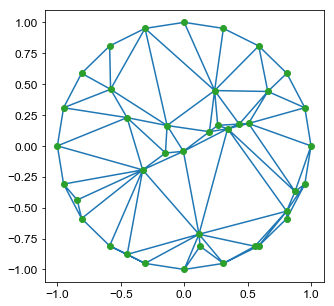

In [50]:
%precision 6
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
from pprint import pprint

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

points = np.array([[-5.80648777e-01,  4.58163020e-01],
       [-4.49366978e-01, -8.78260592e-01],
       [ 1.25344404e-01, -8.11594100e-01],
       [ 6.59107579e-01,  4.40484354e-01],
       [-4.50759558e-01,  2.28830048e-01],
       [ 2.39877465e-01,  4.47880691e-01],
       [ 5.57255517e-01, -8.12278273e-01],
       [ 1.16512866e-01, -7.15055733e-01],
       [ 8.74019766e-01, -3.69078360e-01],
       [ 8.07618256e-01, -5.28387559e-01],
       [-1.35044590e-01,  1.65036839e-01],
       [ 2.64544176e-01,  1.66414371e-01],
       [ 4.33723660e-01,  1.76408613e-01],
       [ 5.07178633e-01,  1.81359072e-01],
       [-6.36539072e-03, -4.40344606e-02],
       [-3.27218295e-01, -1.94144945e-01],
       [ 1.98845151e-01,  1.14897057e-01],
       [ 3.42407131e-01,  1.38783108e-01],
       [-1.47793003e-01, -5.74951448e-02],
       [-8.43598091e-01, -4.37604895e-01],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01],
       [ 1.00000000e+00, -2.44929360e-16]])

from scipy.spatial import Delaunay

tri = Delaunay(points)
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

ax1.triplot(points[:, 0], points[:, 1], tri.simplices)
ax1.plot(points[:, 0], points[:, 1], 'o')

print(tri.vertices)

In [58]:
tri.simplices
print(tri.simplices[2,:])
a = points[tri.simplices[2,:]]
print(a)
a[2,:]
r = np.sqrt((a[0,0]-a[1,0])**2+(a[0,1]-a[1,1])**2)
s = np.sqrt((a[0,0]-a[2,0])**2+(a[0,1]-a[2,1])**2)
t = np.sqrt((a[1,0]-a[2,0])**2+(a[1,1]-a[2,1])**2)
print(r,s,t)
q = np.arccos((r**2 + s**2 - t**2)/(2*r*s))*(180/np.pi)
v = np.arccos((s**2 + t**2 - r**2)/(2*t*s))*(180/np.pi)
w = np.arccos((r**2 + t**2 - s**2)/(2*r*t))*(180/np.pi)
print(q,v,w)
print(q+v+w)

[15  7 14]
[[-0.32721829 -0.19414495]
 [ 0.11651287 -0.71505573]
 [-0.00636539 -0.04403446]]
0.6842845842901832 0.354231200929158 0.6821793121957461
74.64687269687073 75.30463795380474 30.048489349324527
180.0


In [61]:
i = 1
fir = []
sec = []
thir = []
print(tri)
for k in range tri.simplices():
    a = points[k] 
    r = np.sqrt((a[0,0]-a[1,0])**2+(a[0,1]-a[1,1])**2)
    s = np.sqrt((a[0,0]-a[2,0])**2+(a[0,1]-a[2,1])**2)
    t = np.sqrt((a[1,0]-a[2,0])**2+(a[1,1]-a[2,1])**2)
    q = np.arccos((r**2 + s**2 - t**2)/(2*r*s))*(180/np.pi)
    v = np.arccos((s**2 + t**2 - r**2)/(2*t*s))*(180/np.pi)
    w = np.arccos((r**2 + t**2 - s**2)/(2*r*t))*(180/np.pi)
    fir.append(q)
    sec.append(v)
    thir.append(w)
    print(q, v, w)

SyntaxError: invalid syntax (<ipython-input-61-7945837b0012>, line 6)

In [ ]:
i = 1
fir = []
sec = []
thir = []
for k in range(tri.simplices.shape[0]):
    a = tri.simplices[k,0]
    b = tri.simplices[k,1]
    c = tri.simplices[k,2]
    [a1,a2] = points[a] 
    [b1,b2] = points[b] 
    [c1,c2] = points[c] 
    r = np.sqrt((a1-b1)**2+(a2-b2**2))
    s = np.sqrt((a1-c1)**2+(a2-a[2,1]**2))
    t = np.sqrt((a[1,0]-a[2,0])**2+(a[1,1]-a[2,1]**2))
    q = np.arccos((r**2 + s**2 - t**2)/(2*r*s))*(180/np.pi)
    v = np.arccos((s**2 + t**2 - r**2)/(2*t*s))*(180/np.pi)
    w = np.arccos((r**2 + t**2 - s**2)/(2*r*t))*(180/np.pi)
    #fir.append(q)
    #sec.append(v)
    #thir.append(w)
    #print(q, v, w)